In [1823]:
import math
import point_similarity as ps
import scipy.integrate as integrate
import pylab
import mpmath
from scipy.misc import derivative
import plotly
from plotly import graph_objs as go
import sys
import read_arbor_reconstruction as rar
import networkx as nx

In [1454]:
def calc_coeff(G, x, y, p, q):
    b = ((q - y - G*(p*p - x*x))/(p-x))
    c = (q - G*p*p - b*p)

    # assert (G * x * x) + (b * x) + c == y
    # assert (G * p * p) + (b * p) + c == q
    
    return b, c

In [1455]:
calc_coeff(0, 4, 7.5, 7, 2)

(-1.8333333333333333, 14.833333333333332)

In [1524]:
def curve_length(G, x0, y0, p, q):        
    b, c = calc_coeff(G, x0, y0, p, q)
    def differential(x):
        return pylab.sqrt(1 + (2*G*x + b)**2)
    curve, tolerance = integrate.quad(differential, min(x0, p), max(x0, p))
    return curve

In [1525]:
curve_length(0, 3.8, 7.4, 7, 2)

6.276941930590086

In [1526]:
def distance_from_base(root_distance, x, y, x1, y1):
    pair1 = [x, y]
    pair2 = [x1, y1]
    distance = math.dist(pair1, pair2)
    if(x,y) == (x1, y1):
        assert distance == 0
    return distance + root_distance

In [1527]:
distance_from_base(100, 3, 7, 3.8, 7.4)

100.89442719099992

In [1573]:
def total_cost(alpha, G, root_distance, x0, y0, x1, y1, p, q):
    curve = curve_length(G, x1, y1, p, q)
    to_root = distance_from_base(root_distance, x0, y0, x1, y1)
    wiring = curve
    delay = (curve + to_root)
    cost = (alpha * wiring) +  ((1 - alpha) * delay)
    #print("curve = ", curve, "to root = " , to_root, "wiring = ", wiring, "delay = ", delay, "total cost = ", cost)
   # cost = curve + (1 - alpha) * distance_from_base(root_distance, x0, y0, x1, y1)
    return cost

In [1569]:
#for i in pylab.arange(3, 8, 0.01):
   # total_cost(0.8, 0, 0, 3, 7, i, 7, 7, 2)

In [1553]:
def length_func(x0, y0, x1, y1):
    length = pylab.sqrt((x1 - x0)**2 + (y1 - y0)**2)
    return length

In [1554]:
def get_theta(x0, y0, x1, y1):
    theta = pylab.arctan((abs(y1 - y0)/abs(x1 - x0)))
    return theta

In [1802]:
def find_best_cost(alpha, G, root_distance, x0, y0, x1, y1, p, q):
    results = []
    min_t = 0
    delta = 0.01
    max_t = 1
    best_t = math.inf
    best_cost = math.inf
    l = length_func(x0, y0, x1, y1)
    theta = get_theta(x0, y0, x1, y1)
    x_opt = None
    y_opt = None
    best_x = None
    best_y = None
    for t in pylab.arange(min_t, max_t + delta, delta):
        new_x = x0 + t*l*cos(theta)
        new_y = y0 + t*l*sin(theta)
        x_curr = pylab.linspace(min(p, new_x), max(p, new_x))
        cost = total_cost(alpha, G, root_distance, x0, y0, new_x, new_y, p, q)
        if cost < best_cost:
            best_cost = cost
            best_t = t
            b, c = calc_coeff(G, new_x, new_y, p, q)
            best_x = new_x
            best_y = new_y
            #x_opt = x_curr
            #y_opt = G * x_opt ** 2 + b * x_opt + c
        '''
        if t % 0.2 == 0:
            b, c = calc_coeff(G, new_x, new_y, p, q)
            y_inter =  G * x_curr ** 2 + b * x_curr + c
            intermediate_line = go.Scatter(x = x_curr,y = y_inter, mode = "lines", name = str(cost))
            fig.add_trace(intermediate_line)
           ''' 
        results.append(cost)
    ##opt_line = go.Scatter(x = x_opt, y = y_opt, mode = "lines", name = "Optimal: " + str(best_cost))
    ##fig.add_trace(opt_line)
    return best_cost, best_t, best_x, best_y

In [1801]:
'''
pt1 = [5, 0.1]
pt2 = [-13, 2]

p_pt = 7
q_pt = 2
G = 0
alpha = 0.5
Droot = 0
main = go.Scatter(x=pt1, y=pt2, name="main root segment")
pq = go.Scatter(x = [p_pt], y= [q_pt], name="(p,q)")

example_fig = go.Figure()
example_fig.add_trace(main)
example_fig.add_trace(pq)

find_best_cost(alpha, G, Droot, pt1[0], pt2[0], pt1[1], pt2[1], p_pt, q_pt)
example_fig.update_layout(xaxis_range=[2.5, 6.5])
example_fig.update_layout(yaxis_range=[5.5, 8.5])
example_fig.show()
'''

'\npt1 = [5, 0.1]\npt2 = [-13, 2]\n\np_pt = 7\nq_pt = 2\nG = 0\nalpha = 0.5\nDroot = 0\nmain = go.Scatter(x=pt1, y=pt2, name="main root segment")\npq = go.Scatter(x = [p_pt], y= [q_pt], name="(p,q)")\n\nexample_fig = go.Figure()\nexample_fig.add_trace(main)\nexample_fig.add_trace(pq)\n\nfind_best_cost(alpha, G, Droot, pt1[0], pt2[0], pt1[1], pt2[1], p_pt, q_pt)\nexample_fig.update_layout(xaxis_range=[2.5, 6.5])\nexample_fig.update_layout(yaxis_range=[5.5, 8.5])\nexample_fig.show()\n'

In [1563]:
def get_length_and_theta(x0, y0, x1, y1):
    length = length_func(x0, y0, x1, y1)
    theta = get_theta(x0, y0, x1, y1)
    return length, theta

In [1811]:
def three_line_segments(alpha, G, root_distance, x0, y0, x1, y1, x2, y2, x3, y3, p, q):
    min_t = 0
    delta = 0.01
    max_t = 1
    
    s1 = find_best_cost(alpha, G, root_distance, x0, y0, x1, y1, p, q)
    
    segment1_length = length_func(x0, y0, x1, y1)
    s2 = find_best_cost(alpha, G, root_distance + segment1_length, x1, y1, x2, y2, p, q)

    segment2_length = length_func(x1, y1, x2, y2)
    s3 = find_best_cost(alpha, G, root_distance + segment1_length + segment2_length, x2, y2, x3, y3, p, q)
    print(s1)
    print(s2)
    print(s3)
    
    
    return min(s1[0], s2[0], s3[0])

In [1812]:
three_line_segments(1, 0, 10, 0, 0, 0.1, 6, 0.3, 13, 0.2, 19, 2, 10)

(4.428317965096906, 1.0, 0.09999999999999934, 6.0)
(1.7850086834522678, 0.58, 0.21600000000000036, 10.06)
(3.448187929913334, 0.0, 0.3, 13.0)


1.7850086834522678

In [1766]:
def get_xy_coords(t, x0, y0, x1, y1):
    x = x0 + t * get_length_and_theta(x0, y0, x1, y1)[0] * cos(get_length_and_theta(x0, y0, x1, y1)[1])
    y = y0 + t * get_length_and_theta(x0, y0, x1, y1)[0] * sin(get_length_and_theta(x0, y0, x1, y1)[1])
    return x, y

In [1767]:
get_xy_coords(1, 0.1, 6, 0.3, 13)

(0.30000000000000066, 13.0)

In [1805]:
s2_t = find_best_cost(1, 0, 10, 0.1, 6, 0.3, 13, 2, 10)[3]
s2_t

10.06

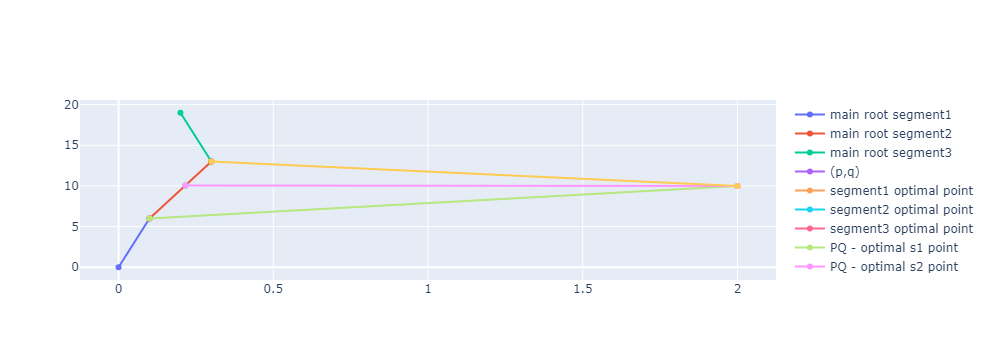

In [1817]:
pt1 = [0, 0.1]
pt2 = [0, 6]

pt3 = [0.1, 0.3]
pt4 = [6, 13]

pt5 = [0.3, 0.2]
pt6 = [13, 19]
p_pt = 2
q_pt = 10
G = 0
alpha = 1
Droot = 10

s1_t = find_best_cost(alpha, G, Droot, pt1[0], pt2[0], pt1[1], pt2[1], p_pt, q_pt)[1]
s1_opt = get_xy_coords(s1_t, pt1[0], pt2[0], pt1[1], pt2[1])

s2_t = find_best_cost(alpha, G, Droot, pt1[1], pt2[1], pt3[1], pt4[1], p_pt, q_pt)[1]
s2_opt = get_xy_coords(s2_t, pt1[1], pt2[1], pt3[1], pt4[1])

s3_t = find_best_cost(alpha, G, Droot, pt3[1], pt4[1], pt5[1], pt6[1], p_pt, q_pt)[1]
s3_opt = get_xy_coords(s3_t, pt3[1], pt4[1], pt5[1], pt6[1])

segment1 = go.Scatter(x=pt1, y=pt2, name="main root segment1")
segment2 = go.Scatter(x=pt3, y=pt4, name="main root segment2")
segment3 = go.Scatter(x=pt5, y=pt6, name="main root segment3")

pq = go.Scatter(x = [p_pt], y= [q_pt], name="(p,q)")

s1_pt = go.Scatter(x = [s1_opt[0]], y = [s1_opt[1]], name = "segment1 optimal point")
s2_pt = go.Scatter(x = [s2_opt[0]], y = [s2_opt[1]], name = "segment2 optimal point")
s3_pt = go.Scatter(x = [s3_opt[0]], y = [s3_opt[1]], name = "segment3 optimal point")

s1_pq_x = [s1_opt[0], p_pt]
s1_pq_y = [s1_opt[1], q_pt]

s1_pq = go.Scatter(x=s1_pq_x, y=s1_pq_y, name="PQ - optimal s1 point")

s2_pq_x = [s2_opt[0], p_pt]
s2_pq_y = [s2_opt[1], q_pt]

s2_pq = go.Scatter(x=s2_pq_x, y=s2_pq_y, name="PQ - optimal s2 point")


s3_pq_x = [s3_opt[0], p_pt]
s3_pq_y = [s3_opt[1], q_pt]

s3_pq = go.Scatter(x=s3_pq_x, y=s3_pq_y, name="PQ - optimal s3 point")

example_fig = go.Figure()
example_fig.add_trace(segment1)
example_fig.add_trace(segment2)
example_fig.add_trace(segment3)
example_fig.add_trace(pq)
example_fig.add_trace(s1_pt)
example_fig.add_trace(s2_pt)
example_fig.add_trace(s3_pt)
example_fig.add_trace(s1_pq)
example_fig.add_trace(s2_pq)
example_fig.add_trace(s3_pq)
# find_best_cost(alpha, G, Droot, pt1[0], pt2[0], pt1[1], pt2[1], p_pt, q_pt, example_fig)
#three_line_segments(alpha, G, Droot, pt1[0], pt2[0], pt1[1], pt2[1], pt3[1], pt4[1], pt5[1], pt6[1], p_pt, q_pt)
example_fig.show()

In [1880]:
def arbor_best_cost(fname, alpha, G, root_distance):
    arbor = rar.read_arbor_full(fname)
    main_root = []
    lat_root = []
    line_segments = {}
    for node in arbor.nodes():
        if arbor.nodes[node]["label"] == ("main root") or arbor.nodes[node]["label"] == ("main root base"):
            main_root.append(node)
        if arbor.nodes[node]["label"] == ("lateral root tip"):
            lat_root.append(node)
    for i in range(1, len(main_root)):
        line_segments[i] = main_root[i - 1], main_root[i]


    # loop through lateral root tips and go through each line segment, return best cost and point
    results = []
    for tip in lat_root:
        for seg in line_segments:
    
            print(line_segments[seg])
            x0 = line_segments[seg][0][0]
            y0 = line_segments[seg][0][1] 
            x1 = line_segments[seg][1][0]
            y1 = line_segments[seg][1][1]
            p = tip[0]
            q = tip[1]
            result = find_best_cost(alpha, G, root_distance, x0, y0, x1, y1, p, q)
            results.append(result)
    return results

In [1881]:
arbor_best_cost('002_1_c_day4.csv', 1, 0, 10)

((6.316246, 4.788182), (6.248517, 5.230901))
((6.248517, 5.230901), (6.172466, 5.448168))
((6.172466, 5.448168), (6.078373, 5.719055))
((6.078373, 5.719055), (6.051647, 5.865528))
((6.051647, 5.865528), (6.02648, 5.978601))
((6.02648, 5.978601), (6.009377, 6.051857))
((6.009377, 6.051857), (5.988092, 6.152656))
((5.988092, 6.152656), (5.888783, 6.313534))
((5.888783, 6.313534), (5.857484, 6.399435))
((5.857484, 6.399435), (5.805855, 6.535716))
((5.805855, 6.535716), (5.771865, 6.631406))
((5.771865, 6.631406), (5.703528, 6.716372))
((5.703528, 6.716372), (5.67063, 6.775653))
((5.67063, 6.775653), (5.644983, 6.913284))
((5.644983, 6.913284), (5.611528, 6.990774))
((5.611528, 6.990774), (5.590928, 7.125623))
((5.590928, 7.125623), (5.565074, 7.224829))
((5.565074, 7.224829), (5.492228, 7.511988))
((6.316246, 4.788182), (6.248517, 5.230901))
((6.248517, 5.230901), (6.172466, 5.448168))
((6.172466, 5.448168), (6.078373, 5.719055))
((6.078373, 5.719055), (6.051647, 5.865528))
((6.051647, 5.

[(3.5518459464516474, 1.0, 6.3839749999999995, 5.230901),
 (3.4489087285373325, 1.0, 6.324567999999999, 5.448168),
 (3.324556043544009, 1.0, 6.266559, 5.719055),
 (3.373468226167544, 1.0, 6.105099, 5.865528),
 (3.337408346710363, 1.0, 6.076814, 5.978601),
 (3.32895894389297, 1.0, 6.043583000000001, 6.051857),
 (3.291512815253345, 1.0, 6.0306619999999995, 6.152656),
 (3.1677678146508788, 1.0, 6.087401, 6.313534),
 (3.283891679053985, 1.0, 5.920082, 6.399435),
 (3.242432066573793, 1.0, 5.9091130000000005, 6.535716),
 (3.274587177671408, 1.0, 5.839845, 6.631406),
 (3.2474263061509188, 1.0, 5.840202, 6.716372),
 (3.329440440785808, 1.0, 5.736426000000001, 6.775653),
 (3.3327368220323064, 1.0, 5.696277, 6.913284),
 (3.3326465330438215, 1.0, 5.678438, 6.990774),
 (3.352047058696521, 1.0, 5.632128, 7.125623),
 (3.3515690378836007, 1.0, 5.616782, 7.224829),
 (3.301646958492837, 1.0, 5.63792, 7.511988),
 (2.352563455557575, 1.0, 6.3839749999999995, 5.230901),
 (2.318324128930422, 1.0, 6.3245679

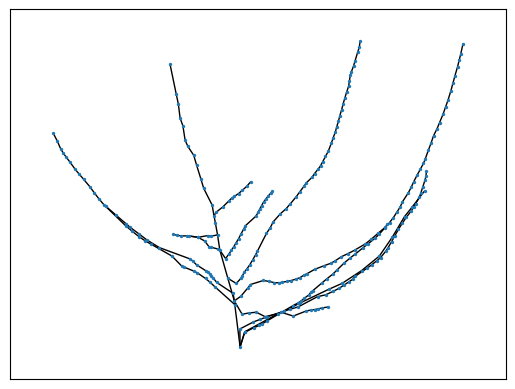

In [1833]:
G = rar.read_arbor_full('002_1_c_day4.csv')
coords = {}
for coordinate in list(G.nodes):
    coords[coordinate] = coordinate

nx.draw_networkx(G, pos = coords, with_labels = False, node_size = 2)

In [1834]:
list(G.nodes(data = True))

[((6.316246, 4.788182), {'label': 'main root base'}),
 ((6.248517, 5.230901), {'label': 'main root'}),
 ((6.172466, 5.448168), {'label': 'main root'}),
 ((6.078373, 5.719055), {'label': 'main root'}),
 ((6.051647, 5.865528), {'label': 'main root'}),
 ((6.02648, 5.978601), {'label': 'main root'}),
 ((6.009377, 6.051857), {'label': 'main root'}),
 ((5.988092, 6.152656), {'label': 'main root'}),
 ((5.888783, 6.313534), {'label': 'main root'}),
 ((5.857484, 6.399435), {'label': 'main root'}),
 ((5.805855, 6.535716), {'label': 'main root'}),
 ((5.771865, 6.631406), {'label': 'main root'}),
 ((5.703528, 6.716372), {'label': 'main root'}),
 ((5.67063, 6.775653), {'label': 'main root'}),
 ((5.644983, 6.913284), {'label': 'main root'}),
 ((5.611528, 6.990774), {'label': 'main root'}),
 ((5.590928, 7.125623), {'label': 'main root'}),
 ((5.565074, 7.224829), {'label': 'main root'}),
 ((5.492228, 7.511988), {'label': 'main root'}),
 ((6.370103, 4.928189), {'label': 'lateral root'}),
 ((6.481349, 4